# Práctica 5: primer modelo de clasificación n-dimensional

### Buscando el modelo de clasificación con todas las características

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataset
def load_dataset(filename):
    #Como un Dataframe
    data = read_csv(filename, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [3]:
#Cargamos el dataset
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

Accuracy/exactitud: 100.00 %


## Buscando el modelo de clasificación con selección de características vía Chi-cuadrada

In [4]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 23.183838
Característica 1: 15.900000
Característica 2: 17.375661
Característica 3: 10.378601
Característica 4: 2.158102
Característica 5: 1.070940
Característica 6: 16.359722
Característica 7: 6.754545
Característica 8: 0.724786
Característica 9: 2.961111
Característica 10: nan
Característica 11: 3.081481
Característica 12: nan
Característica 13: nan
Característica 14: nan
Característica 15: nan
Característica 16: nan
Característica 17: nan
Característica 18: nan
Característica 19: 1.457716
Característica 20: 28.693122
Característica 21: 15.525000
Característica 22: 23.000000
Característica 23: 9.947712
Característica 24: 15.600000
Característica 25: 22.000000
Característica 26: 22.000000
Característica 27: 17.000000
Característica 28: nan
Característica 29: nan
Característica 30: nan
Característica 31: nan
Característica 32: nan
Característica 33: nan
Característica 34: 18.520000
Accuracy/exactitud: 68.75 %


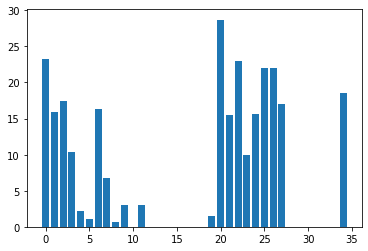

In [5]:
#Cargamos el dataset
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

## Buscando el modelo de clasificación con selección de características vía Información Mutua

In [6]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.247320
Característica 1: 0.502720
Característica 2: 0.737643
Característica 3: 0.591836
Característica 4: 0.111141
Característica 5: 0.000000
Característica 6: 0.818490
Característica 7: 0.126088
Característica 8: 0.000000
Característica 9: 0.462395
Característica 10: 0.000000
Característica 11: 0.401210
Característica 12: 0.000000
Característica 13: 0.000000
Característica 14: 0.080339
Característica 15: 0.029406
Característica 16: 0.000000
Característica 17: 0.000000
Característica 18: 0.000000
Característica 19: 0.000000
Característica 20: 1.526708
Característica 21: 1.477399
Característica 22: 0.555902
Característica 23: 1.022305
Característica 24: 0.087822
Característica 25: 0.644083
Característica 26: 0.659991
Característica 27: 1.062921
Característica 28: 0.212576
Característica 29: 0.000000
Característica 30: 0.000000
Característica 31: 0.000000
Característica 32: 0.000000
Característica 33: 0.027365
Característica 34: 0.431255
Accuracy/exactitud: 100.00 %


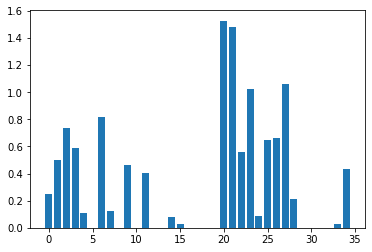

In [8]:
#Cargamos el dataset
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')